In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline 
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [8]:
# Reading the dataset
data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [10]:
# checking null values
data.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

Text(0, 0.5, 'Freq')

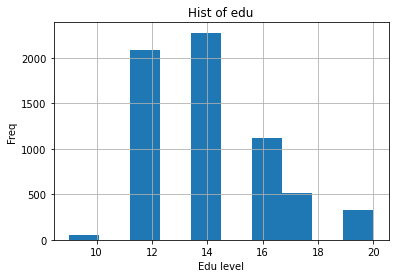

In [11]:
#plotting the edu column hist
data.educ.hist()
plt.title('Hist of edu')
plt.xlabel('Edu level')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

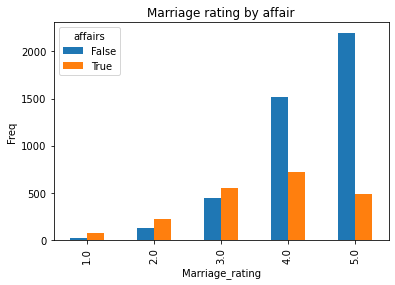

In [12]:
#barplot of marriage rating grouped by affair
pd.crosstab(data.rate_marriage, data.affairs.astype(bool)).plot(kind = 'bar')
plt.title('Marriage rating by affair')
plt.xlabel('Marriage_rating')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

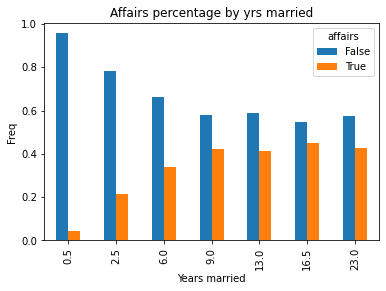

In [13]:
affair_yrs_married = pd.crosstab(data.yrs_married, data.affairs.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis = 0).plot(kind = 'bar') 
plt.title('Affairs percentage by yrs married')
plt.xlabel('Years married')
plt.ylabel('Freq')

In [14]:
data['affairs']=(data.affairs>0).astype(int)

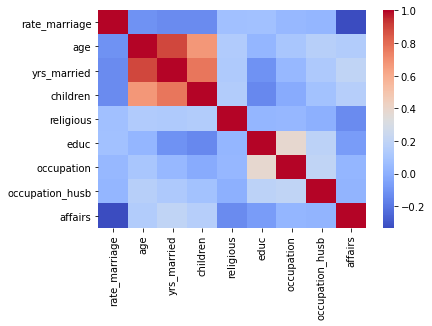

In [16]:
# Correlation plot:

sns.heatmap(data.corr(),cmap='coolwarm');

In [20]:
# create intercept column and dummy var
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', data, return_type = 'dataframe')
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [21]:
# changing column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husband)[T.2.0]':'occ_husb_2',
                        'C(occupation_husband)[T.3.0]':'occ_husb_3',
                        'C(occupation_husband)[T.4.0]':'occ_husb_4',
                        'C(occupation_husband)[T.5.0]':'occ_husb_5',
                        'C(occupation_husband)[T.6.0]':'occ_husb_6'})

In [22]:
# flatten y into a 1-D array
y = np.ravel(y)

In [30]:
# initiate a model, fix X and y
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
model = lr.fit(X,y)

#check accuracy on the training set
model.score(X,y)

0.7266729500471254

In [47]:
# splitting data into train and test dataset
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state = 42)

In [48]:
# Fitting the model
lr= LogisticRegression(solver='lbfgs', max_iter=1000)
model = lr.fit(X_train,y_train)

In [49]:
# Predicting the output of test dataset
predict = model.predict(X_test)

In [50]:
# accuracy score
metrics.accuracy_score(y_test,predict)

0.724607329842932

In [51]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,predict)
conf_mat

array([[1140,  135],
       [ 391,  244]], dtype=int64)

In [52]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [53]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.724607329842932

In [54]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8941176470588236

In [55]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.744611365120836

In [56]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.812544547398432

In [57]:
# Area Under Curve
auc = roc_auc_score(y_test, predict)
auc

0.6391848077813803

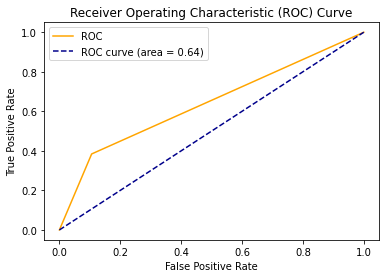

In [58]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predict)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()